In [1]:
import pandas as pd
from pandas import Series,DataFrame

"""
IMPORTANT NOTE: If parsing Excel files fails, conda install xlrd AND openpyxl
"""

# BLS dataset for labor participation
bls_file = pd.ExcelFile('staadata.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
header = ['FIPS Code', 'State', 'Year', 'Civilian non-institutional population',
           'Civilian labor force Total', 'CLF Percent of population', 'CLF Employment Total',
           'CLF Employment Percent of population', 'CLF Unemployment Total',
           'CLF Unemployment Rate'
          ]
bls = bls_file.parse('Sheet1', skiprows=7, names=header)
bls12 = bls[bls.Year == 2012]
bls12 = bls12[['State','CLF Employment Percent of population','CLF Unemployment Rate']]
bls12['CLF Employment Percent of population'] = pd.to_numeric(bls12['CLF Employment Percent of population'])
bls12['CLF Unemployment Rate'] = pd.to_numeric(bls12['CLF Unemployment Rate'])
bls12.set_index('State')

# 2012 Election data to determine if a state is "red" or "blue"
pres_file = pd.ExcelFile('2012pres.xls')
pres = pres_file.parse('2012 Pres General Results')
pres = pres.drop([1, 'FEC ID', 'STATE ABBREVIATION', 'GENERAL ELECTION DATE'], axis=1)
Dem = pres[pres['LAST NAME'] == 'Obama'].set_index('STATE')
Rep = pres[pres['LAST NAME'] == 'Romney'].set_index('STATE')
Dem_Rep = pd.DataFrame(Dem['GENERAL %'] - Rep['GENERAL %'])
Dem_Rep.rename(columns={'GENERAL %': 'PercentDemocratHasOverRepublican'}, inplace=True)
Dem_Rep.reset_index(level=0, inplace=True)

# Load income per capita as response variable
income = pd.read_csv('per_capita_income.csv', low_memory=False)
income = income[[1, 2]]
income.set_index('State')

# Merge data sets
data = pd.merge(Dem_Rep, income, left_on='STATE', right_on='State')
data = pd.merge(data, bls12).drop(['STATE'], axis=1).set_index('State')
data.columns = ['Percent Democrat Has Over Republican', 'IncomePerCapita',
                'Labor Participation', 'Unemployment Rate']
data['Percent Democrat Has Over Republican'] = pd.to_numeric(data['Percent Democrat Has Over Republican'])
data['IncomePerCapita'] = data['IncomePerCapita'].apply(lambda x: x.replace('$', '').replace(',', ''))
data['IncomePerCapita'] = pd.to_numeric(data['IncomePerCapita'])
data['Labor Participation'] = pd.to_numeric(data['Labor Participation'])
data['Unemployment Rate'] = pd.to_numeric(data['Unemployment Rate'])
data

,Percent Democrat Has Over Republican,IncomePerCapita,Labor Participation,Unemployment Rate
State,,,,
Alabama,-0.221868,23606,53.4,8.0
Alaska,-0.139889,33062,63.4,7.1
Arizona,-0.090648,25715,55.5,8.3
Arkansas,-0.236879,22883,54.8,7.6
California,0.231186,30441,56.6,10.4
Colorado,0.053652,32357,63.6,7.9
Connecticut,0.173315,39373,60.9,8.3
Delaware,0.186267,30488,57.4,7.2
District of Columbia,0.836348,45877,62.9,9.0


Association between Percent Democrat Has Over Republican and IncomePerCapita
(0.67728941142862042, 2.5603121647192332e-08)


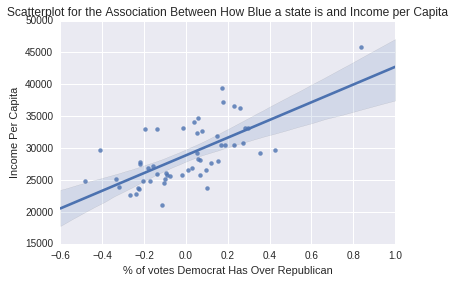

In [2]:
import scipy.stats
print ('Association between Percent Democrat Has Over Republican and IncomePerCapita')
print (scipy.stats.pearsonr(data['Percent Democrat Has Over Republican'], data['IncomePerCapita']))

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
scat1 = seaborn.regplot(x="Percent Democrat Has Over Republican", y="IncomePerCapita", fit_reg=True, data=data)
plt.xlabel('% of votes Democrat Has Over Republican')
plt.ylabel('Income Per Capita')
plt.title('Scatterplot for the Association Between How Blue a state is and Income per Capita')
plt.show()

Association between Percent Democrat Has Over Republican and Labor Participation
(-0.00021695478035273574, 0.99876982910348144)


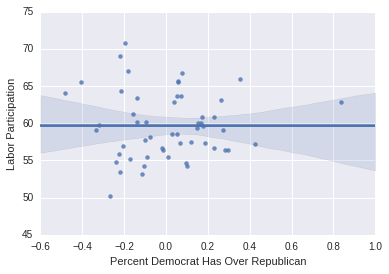

In [3]:
print ('Association between Percent Democrat Has Over Republican and Labor Participation')
print (scipy.stats.pearsonr(data['Percent Democrat Has Over Republican'], data['Labor Participation']))
scat2 = seaborn.regplot(x="Percent Democrat Has Over Republican", y="Labor Participation", fit_reg=True, data=data)